# Application:  Crystallization Kinetics of Amorphous $TiO_2$

:::{admonition} Learning Objectives  
After completing this lesson, you should be able to:  
* load functions from a different notebook using `%run`
* perform Single Peak Fitting of XRD data using `Scipy curve_fit()`  
* integrate the area under a curve
* fit Transformation vs Time data to the Avrami Equation (see Chapter 10 of your Callister textbook for example)
* compare k and n fitting parameters to that of the paper
* recognize that literature papers can often contain mistakes. 
:::

For the next 3 weeks of lessons, we will look at several different methods of fitting data. All lessons will pull data from the literature using the digitizing functions (`selectdata()`, `cal()`) that we created in the last couple of lessons. These two functions are saved in file `getpix_utilities.ipynb` so we can import these into our notebooks using `%run`.  We can't use our import method since these functions have interactive content. 

:::{important}  
We need to use `%run getpix_utilities.ipynb` and not import to load our functions from the file getpix_utilities.ipynb.  This is because python import does not like "magic" commands such as %matplotlib widget.  
:::

**Download:**  [getpix_utilities.ipynb](https://drive.google.com/uc?export=download&id=1lrKrd5tqYUn88Cfh8_ntL4o8lAZTjmHG)

In [1]:
%run getpix_utilities.ipynb

Help on function cal in module __main__:

cal(pixpts, plotpts, datatoconvert)
    pixpts = list of three pixel points (typically along axes)
    plotpts = list of three points corresponding to pixpts but in plot units
    datatoconvert = list of pixel points to convert to plot coordinates

Help on function selectdata in module __main__:

selectdata(path_to_image_file, fig_size_as_tuple=(6, 6), color='blue')
    path_to_image_file example: r"C:/Users/Sean/images/xrd data.png"  
    pixel data stored in global variable "pixel_positions"
    fig_size_as_tuple e.g. (8,12) This adjusts the image size shown.



## Application description

The data and figures for this lesson were taken from: (Crystallization Kinetics of Amorphous $TiO_2$, *Thin Solid Films* 519 (2010) 1649-1654)

:::{image} ../images/09_reference.png
:width: 500px
:align: center
:::  
<br>

<img alt="" src="../images/09_reference.png" width=500px>

The X-ray diffraction data below are for 180 nm samples of $TiO_2$ that are initially amorphous at room temperature. The temperature of the amorphous sample was increased to the indicated temperatures for a fixed time which begins the crystallization process (the amorphous phase is unstable).  The presence of a peak in the X-ray data indicates the presence of the crystalline phase.  The area under each peak is proportional to the fraction of the sample that has been crystallized.  Notice that the peak no longer changes after 260 C.  This is because at this point the sample is 100% crystallized.  We can take the area under this curve or the 280 C curve to represent 100% crystalline $TiO_2$. 

:::{image} ../images/09_xrd.png
:width: 400px
:align: center
:::

<img alt="" src="../images/09_xrd.png" width=400px>

Another way to collect the data is to calculate the area under the peak at a fixed temperature as a function of time.  In this way we can get the fraction of the sample that has been crystallized as a function of time. This data is shown below. 

:::{image} ../images/09_crystalliz_data.png
:width: 400px
:align: center
:::

<img alt="" src="../images/09_crystalliz_data.png" width=400px>

Fitting the curves in the above figure to the [avrami equation](https://en.wikipedia.org/wiki/Avrami_equation), $Y=1-\exp(-K\ t^n)$, allows us to calculate the avrami constants, $K$ and $n$.  In this equation, $Y$ is the fraction of crystallization (Normalized intensity) and $t$ is the time in hours.  The authors had some trouble fitting the above data and so introduced an offset in time labeled $t_0$.  This was attributed to an incubation time.  This is not correct.  The incubation time is already part of the derivation of the avrami equation. Because of this, the values for $K$ and $n$ below are not correct.  We are going to fit the data above and correct the $K$ and $n$ values.  

:::{image} ../images/09_avrami_numbers.png
:width: 400px
:align: center
:::

<img alt="" src="../images/09_avrami_numbers.png" width=400px>

:::{note}
In the Figure above, we are only interested in the filled squares ($n$) and the filled triangles ($K$).  We will compare these values to what we get by applying the avrami equation correctly.  
:::

## Load packages and define functions

We have already loaded our functions  `selectdata()` and `cal()` previously: 
```python
%run getpix_utilities.ipynb
```
If you haven't, then do that now.  

## Reproduce the normalized intensity vs time data 

Recall that the author's of the publication were not able to fit this data without creating an additional fitting parameter (which invalidated their analysis). The python fitting routine below will have no problem fitting the data giving us a more accurate measurement of the parameters $K$ and $n$.  

In [62]:
%run getpix_utilities.ipynb

Help on function cal in module __main__:

cal(pixpts, plotpts, datatoconvert)
    pixpts = list of three pixel points (typically along axes)
    plotpts = list of three points corresponding to pixpts but in plot units
    datatoconvert = list of pixel points to convert to plot coordinates

Help on function selectdata in module __main__:

selectdata(path_to_image_file, fig_size_as_tuple=(6, 6))
    path_to_image_file example: r"C:/Users/Sean/images/xrd data.png"  
    pixel data stored in global variable "pixel_positions"
    fig_size_as_tuple e.g. (8,12) This adjusts the image size shown.



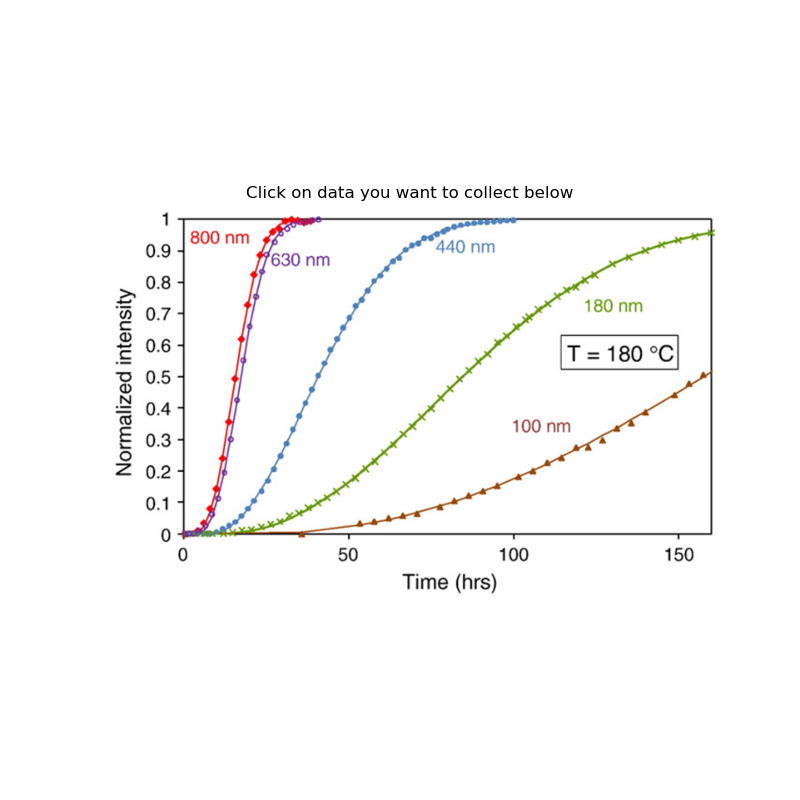

In [4]:
selectdata('../images/09_crystalliz_data.png', (8,8))

In [127]:
data180_pix=pixel_positions[0:-3] #last three points are the calibration pts

In [128]:
cal_pix=pixel_positions[-3:] # calibration pts = last three
plt_pts=[[150,0],[0,0],[0,1]] # corresponding pts in plot units

My data is shown below as small filled blue circles on the 180 nm data set.  You may need to expand the image by clicking on it to see my points since they are fairly small.  

:::{image} ../images/09_crys_pts.png
:width: 500px
:align: center
:::

<img alt="" src="../images/09_crys_pts.png" width=550px>

Calibrate and convert your data and plot

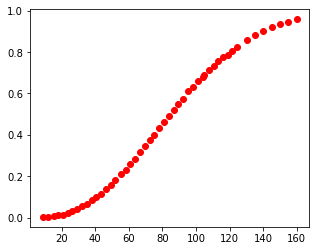

In [129]:
%matplotlib inline
plot_data1=cal(cal_pix, plt_pts, data180_pix)
    
plt.subplots(figsize=[5,4])
plt.plot(plot_data1[:,0], plot_data1[:,1], 'ro')
plt.show()

## Fit the data to the avrami equation using `curve_fit()` from scipy

Avrami equation (recall this from Callister, Chap 10)

$$\large Y=1-e^{-K t^n}$$

option 1: k = 1.124e-05 and n = 2.48
option 2: k = 1.125e-05 and n = 2.48


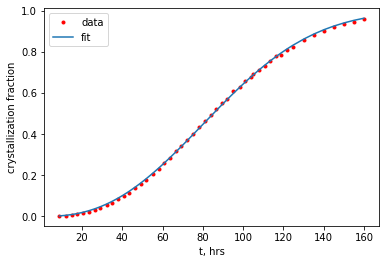

In [133]:
#just making sure that the interactive plotting is off
%matplotlib inline 
from scipy.optimize import curve_fit


# in function definition the independent variable must come first, then the fitting parameters
# notice "t" is first here, then "k" and "n"
def avrami(t,k,n): 
    return(1-np.exp(-k*t**n))

# nonlinear fits can be a bit sensitive so you may have to play with the initial guess "p0" to get a good fit
# here I used an initial guess, p0, for the parameters, k & n, rather than using bounds
popt1, _ = curve_fit(avrami, plot_data1[:,0], plot_data1[:,1], p0=[1e-4, 3]) 

# bounds can also be used by letting the routine know that the lower bound is zero i.e. k and n are positive
popt2, _ = curve_fit(avrami, plot_data1[:,0], plot_data1[:,1],bounds=([0,0],[np.inf,np.inf]))


print(f'option 1: k = {popt1[0]:.3e} and n = {popt1[1]:.2f}')
print(f'option 2: k = {popt2[0]:.3e} and n = {popt2[1]:.2f}')
plt.plot(plot_data1[:,0], plot_data1[:,1], 'r.', label='data');
plt.plot(plot_data1[:,0], avrami(plot_data1[:,0], *popt1), label="fit");
plt.xlabel('t, hrs')
plt.ylabel('crystallization fraction')
plt.legend();
plt.show()


Another option for fitting is to transform our equation to a linear equation by taking the ln of both sides twice to get $\log\left(\ln\left(\frac{1}{1-Y}\right)\right)=\log(K) + n \log(t)$.  So if we plot the $\log\left(\ln\left(\frac{1}{1-Y}\right)\right)$ vs $\log(t)$, we should get a linear relationship that we can fit with a simple linear function.  

 n = 2.59e+00 and logK = -5.17 or K = 6.81e-06


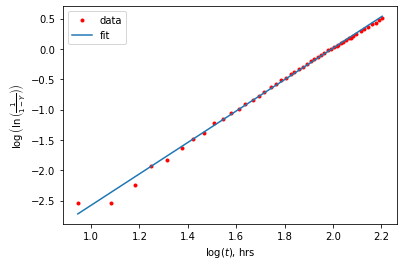

In [141]:
def lin(x,n,logK): 
    return(n*x+logK)
tlog=np.log10(plot_data1[:,0])
Ylogln=np.log10(np.log(1/(1-plot_data1[:,1])))

# nonlinear fits can be a bit sensitive so you may have to play with the initial guess "p0" to get a good fit
# here I used an initial guess, p0, for the parameters, k & n, rather than using bounds
popt, _ = curve_fit(lin, tlog, Ylogln) 

# bounds can also be used by letting the routine know that the lower bound is zero i.e. k and n are positive
#popt2, _ = curve_fit(avrami, plot_data1[:,0], plot_data1[:,1],bounds=([0,0],[np.inf,np.inf]))


print(f' n = {popt[0]:.2e} and logK = {popt[1]:.2f} or K = {10**popt[1]:.2e}')
plt.plot(tlog, Ylogln,'r.', label='data');
plt.plot(tlog, lin(tlog, *popt), label="fit");
#plt.plot(tlog, lin(tlog, 2.48,np.log10(1.125e-5)), label="expfit");
plt.xlabel(r'$\log(t)$, hrs')
plt.ylabel(r'$\log\left(\ln\left(\frac{1}{1-Y}\right)\right)$')
plt.legend();
plt.show()

## Fiting with peak functions

### Let's reproduce the 280 C curve

You can always use ctrl+"+" to increase the zoom level in your browser so you can pick points more accurately.  Ctrl+"-" will decrease your zoom level.  

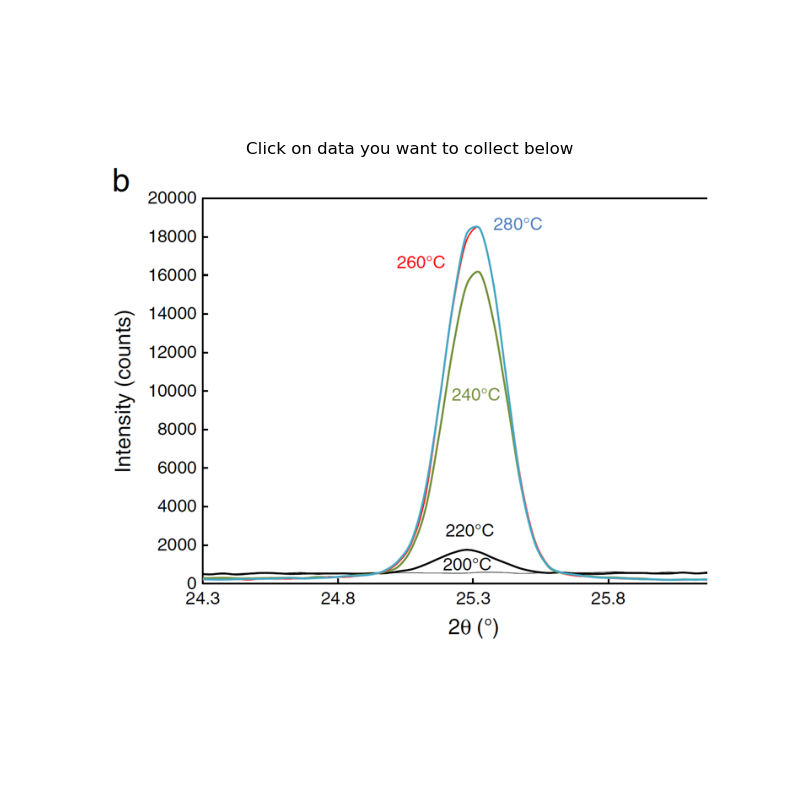

In [6]:
selectdata('../images/09_xrd.png', (8,8))

Your output from above should look something like this: 

:::{image} ../images/09_pix_cal.png
:width: 500px
:align: center
:::

<img alt="" src="../images/09_pix_cal.png" width=500px>

In [147]:
peak280_pix=pixel_positions[0:-3]
cal_pix=pixel_positions[-3:] # calibration pts = last three
plt_pts=[[25.8,0],[24.3,0],[24.3,20000]] # corresponding pts in plot units

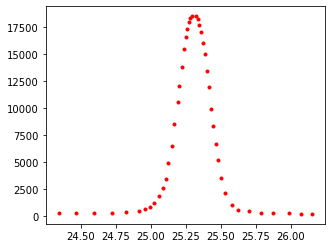

In [149]:
%matplotlib inline
plot_data1=cal(cal_pix, plt_pts, peak280_pix)
    
plt.subplots(figsize=[5,4])
plt.plot(plot_data1[:,0], plot_data1[:,1], 'r.')
plt.show()

## Fit the peak data
There are several peak functions that can be used and I've given 3 more examples in the [Appendix](3114:09:appendix:other-peak-fitting-functions).  The function below is Lorentzian distribution where $A$ is the amplitude, $\mu$ is the position of the peak (mean), and $\sigma$ defines the peak width (stddev).  For our data, $x$ would be the angle, $2 \theta$. 

$$f(x; A, \mu,\sigma)=\frac{A}{\pi}\left[\frac{\sigma}{(x-\mu)^2+\sigma^2}\right]$$

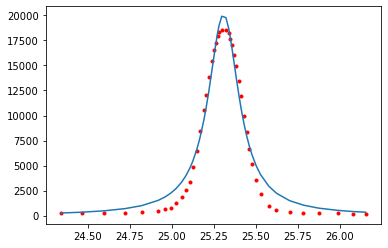

In [154]:
from scipy.optimize import curve_fit  ## we need our curve fitting routine from scipy

# let's define a function that calculates the lorentzian
def lorentzian(x, A, mean, stddev):
    return A/np.pi * (stddev/((x-mean)**2+stddev**2))

# let's curve fit our plot_data1. curve_fit returns two values we only need the first which we call
# popt. The second we call "__" as a throw away variable.  
# format here curve_fit(model_name, xdata, ydata, bounds_on_parameters)
popt, _ = curve_fit(lorentzian, plot_data1[:,0], plot_data1[:,1], bounds=[[0, 24, 0],[20000,26,2]])
# the bounds in the fit above help the routine find a fit.  These are given as [[lower],[upper]]
# where lower correspond to the lower bound for our three variables "amplitude", "mean", & "stddev"
# the order is taken from the order given in the function lorentzian above
# for example the amplitude, mean, and stddev have lower bounds of 0, 24, and 0 respectively 
# and a corresponding upper bound of 20000, 26, and 2 respectively.    

plt.plot(plot_data1[:,0], plot_data1[:,1], 'r.')
plt.plot(plot_data1[:,0], lorentzian(plot_data1[:,0], *popt))
plt.show()

The lorentzian does not do a good job at fitting this type of peak.  We should probably use a different function as defined in the Appendix. Perhaps a [Gaussian](3114:09:appendix:gaussian) function or a combination of the two. 

## Finding the area under a function 

Now we can work on integrating our fitted function over the peak position to find the area under the curve.  The area in this case is proportional to the fraction of crystallization.  We can use the area under the 280 C curve as our fully crystallized case and compare all other areas to this one.    

In [161]:
import scipy.integrate as integrate
import scipy.special as special

model=lorentzian #this is our function we defined previously
min=np.min(plot_data1[:,0])
max=np.max(plot_data1[:,0])
print(f'Integration from a 2theta of {min:.2f} to {max:.2f}')

# we use integrate.quad()
result = integrate.quad(lambda x: model(x, *popt), min, max)
result

Integration from a 2theta of 24.34 to 26.15


(6494.723506754889, 7.482246257402135e-05)

If we were to find the area under the 240 degree peak and divide by the area of 6495 that we just found for the 280 degree peak.  This ratio would give the fraction of the sample that crystallized at 240 degrees. 

As mentioned before, other fitting functions are given in the appendix.  Below shows a fit to the peak data that is a linear combination of the lorentzian function and the gaussian function (both are given in the appendix).  

In [ ]:
model=lorentzian

popt2, _ = curve_fit(model, plot_data2[:,0], plot_data2[:,1], bounds=[[0, 24, 0],[20000,26,2]])

plt.plot(plot_data1[:,0], plot_data1[:,1], 'r.');
plt.plot(np.arange(24.25, 26.5, 0.01), lorentzian(np.arange(24.25, 26.5, 0.01), *popt));
plt.plot(plot_data2[:,0], plot_data2[:,1], 'b.');
plt.plot(np.arange(24.25, 26.5, 0.01), lorentzian(np.arange(24.25, 26.5, 0.01), *popt2));

My output using a weighted lorentzian + gaussian model does a nice job:    
<img alt="" src="../images/09_lorentz_gauss_fit.png" width=450px>

My output using a [weighted lorentzian + gaussian model](3114:09:appendix:weighted-sum) does a nice job: 

:::{image} ../images/09_lorentz_gauss_fit.png
:width: 450px
:align: center
:::

(3114:09:appendix:other-peak-fitting-functions)=
## Appendix: Other Peak Fitting Functions

(3114:09:appendix:gaussian)=
### Gaussian

$$f(x; A, \mu,\sigma)=\frac{A}{\sigma \sqrt{2\pi}}e^{\left[-(x-\mu)^2/(2\sigma^2)\right]}$$

In [ ]:
from scipy.optimize import curve_fit

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-1/2*((x - mean) / stddev)**2)

popt, _ = curve_fit(gaussian, plot_data1[:,0], plot_data1[:,1], p0=[10000, 25, 0.5], bounds=[[5000, 24, 0],[20000,26,2]])

plt.plot(plot_data1[:,0], plot_data1[:,1], 'r.');
plt.plot(plot_data1[:,0], gaussian(plot_data1[:,0], *popt));

Gaussian model:

<img alt="" src="../images/09_gaussian.png" width=450px>

:::{image} ../images/09_gaussian.png
:width: 450px
:align: center
:::

### Voigt

$$f(x; A, \mu,\sigma,\gamma)=\frac{A\ Re[w(z)]}{\sigma \sqrt{2 \pi}}$$
where
$$z=\frac{x-\mu+i\gamma}{\sigma\sqrt{2}}$$
$$w(z)=e^{-z^2}\ \text{erfc}(-i z)$$

In [ ]:
from scipy.special import erfc

# def voigt(x, amplitude, mean, stddev, gamma):
#     z=(x-mean+gamma*1j)/(stddev*np.sqrt(2))
#     w=np.exp(-1*z**2)*erfc(-z*1j)
#     return amplitude * np.real(w)/(stddev*np.sqrt(2*np.pi))

def voigt(x, amplitude, mean, stddev,c):
    gamma=c*stddev #gamma is often constrained to equal stddev this line lets us fit gamma but define it relative to stddev
    z=(x-mean+gamma*1j)/(stddev*np.sqrt(2))
    w=np.exp(-1*z**2)*erfc(-z*1j)
    return amplitude * np.real(w)/(stddev*np.sqrt(2*np.pi))

popt, _ = curve_fit(voigt, plot_data1[:,0], plot_data1[:,1], bounds=[[300, 24, 0,0.01],[20000,26,2,1]])

plt.plot(plot_data1[:,0], plot_data1[:,1], 'r.');
plt.plot(plot_data1[:,0], voigt(plot_data1[:,0], *popt));

Voigt model:

<img alt="" src="../images/09_voigt.png" width=450px>

:::{image} ../images/09_voigt.png
:width: 450px
:align: center
:::

(3114:09:appendix:weighted-sum)=
### Weighted sum of Gaussian and Lorentz

$$f(x; A, \mu,\sigma,\alpha)=\frac{\alpha A}{\pi}\left[\frac{\sigma}{(x-\mu)^2+\sigma^2}\right] + 
\frac{(1-\alpha) A}{\sigma_g \sqrt{2\pi}}e^{\left[-(x-\mu)^2/(2\sigma_g^2)\right]}$$
where $\sigma_g=\frac{\sigma}{\sqrt{2 \ln(2)}}$

In [ ]:
def gaussian(x, amplitude, mean, stddev, alpha):
    stddevg=stddev/(2*np.log(2))
    return (1-alpha)*amplitude * np.exp(-1/2*((x - mean) / stddevg)**2)

def lorentzian(x, amplitude, mean, stddev, alpha):
    return alpha*amplitude * (stddev/((x-mean)**2+stddev**2))

def model(x,amplitude, mean, stddev, alpha):
    return(gaussian(x,amplitude, mean, stddev, alpha)+lorentzian(x,amplitude, mean, stddev, alpha))

popt, _ = curve_fit(model, plot_data1[:,0], plot_data1[:,1], bounds=[[0, 24, 0,0],[20000,26,2,1]])

plt.plot(plot_data1[:,0], plot_data1[:,1], 'r.');
plt.plot(plot_data1[:,0], model(plot_data1[:,0], *popt));

Gaussian + Lorentzian fit

<img alt="" src="../images/09_gauss_lorentz.png" width=450px>

:::{image} ../images/09_gauss_lorentz.png
:width: 450px
:align: center
:::

## Exercises

:::{note}
For the problems below, load the functions selectdata() and cal() by using the `%run notebook_name.ipynb` as shown in this lesson.  You don't have to use my exact function definitions nor name them as I have but you need two functions, one to turn your pixel data into plot units and one to allow you to display an image file and select points.   
:::

### Problem 1: Fit to Avrami equation

Determine the values $n$ and $K$ of the Avrami equation, $Y=1-e^{-K t^n}$ for the 440 nm data shown below. Remember it helps to give initial guesses for the values $n$ and $K$ when performing the fit.  You can expect $K$ to be something like $10^{-4}$ and $n$ is a value typically between 2 and 3. *Include a plot of the 440 data and your Avrami fit on the same plot to give a feel for the goodness of fit.*  

:::{image} ../images/09_crystalliz_data.png
:width: 400px
:align: center
:::

<img alt="" src="../images/09_crystalliz_data.png" width=400px>

### Problem 2: (requires answer from problem 1)

Get the values for $n$ from the plot below for the 180nm and 440nm thickness.  Then compare these to the values we obtained.  For the 180 nm sample, we found $n$ = 2.48 in the lesson.  For the 440 nm sample, you found $n$ from problem 1 above.  To compare values, you can present the difference as a percent i.e., $100*(paper\_value - our\_value)/our\_value$. *No plots required for this problem but your final answer should be a print statement using f-string formatting.*  Using an f-string print the following as your answer: **"For the 440 nm thick sample, an avrami exponent of ## was obtained while the value in the paper was ##.  The paper value is in error by ##%"** where the "##" are passed to the print statement using their variable names. Format your values for n and % to 2 decimals float e.g. `{n_value:.2f}`.  The values in the paper are a result of the authors fitting $y=1-exp(-k  (t-t_0)^n)$  rather than the avrami equation which should be $y=1-exp(-k  t^n).$  

:::{image} ../images/09_avrami_numbers.png
:width: 500px
:align: center
:::

<img alt="" src="../images/09_avrami_numbers.png" width=400px>

### Problem 3: Peak fitting

Reproduce the 240 C curve shown below.  You should use enough data points to fully define the peak function as shown below for the 280 C data.  Plot the 240 C data along with the 280 C data.  Label your axes and title your plot.  Also include a legend.  The 280 C pixel data is given below to save you some time.  Next, fit both sets of data to the [gaussian model](3114:09:appendix:gaussian).  Include these fitted results in your plot and add to the legend.    

:::{image} ../images/09_pix_cal.png
:width: 500px
:align: center
:::

<img alt="" src="../images/09_pix_cal.png" width=500px>

:::{important}  
If you want to use the same calibration on the 280 data given below as you use for your 240 data then perform your `selectdata()` routine on image **09_xrd.png**.  Otherwise, use the `cal280_pix` given below for the calibration of the 280 data.  
:::  

In [ ]:
###### Below is the 280 pixel data as well as the calibration points for image: 09_xrd.png  
peak280_pix=[[713.4247311827957, 77.84331317204294],
 [688.3978494623656, 77.84331317204294],
 [660.736559139785, 79.16051747311826],
 [623.8548387096774, 79.16051747311826],
 [594.8763440860215, 80.47772177419353],
 [568.5322580645161, 83.11213037634406],
 [543.505376344086, 87.06374327956985],
 [529.016129032258, 96.28417338709676],
 [513.2096774193549, 122.6282594086021],
 [505.30645161290323, 154.24116263440857],
 [497.40322580645153, 191.1228830645161],
 [492.1344086021505, 225.37019489247308],
 [486.8655913978494, 263.56911962365587],
 [481.59677419354836, 300.4508400537634],
 [476.3279569892473, 346.55299059139776],
 [472.37634408602145, 379.4830981182795],
 [467.1075268817204, 415.04761424731174],
 [463.15591397849454, 438.75729166666656],
 [459.2043010752688, 461.1497647849461],
 [455.25268817204295, 476.9562163978494],
 [452.6182795698924, 488.8110551075267],
 [447.34946236559136, 495.3970766129031],
 [439.4462365591398, 495.3970766129031],
 [434.1774193548387, 491.44546370967737],
 [431.5430107526882, 482.22503360215046],
 [427.59139784946234, 467.7357862903225],
 [424.9569892473118, 451.9293346774192],
 [421.00537634408596, 426.9024529569891],
 [414.4193548387097, 388.7035282258064],
 [409.1505376344085, 347.870194892473],
 [405.1989247311828, 314.94008736559135],
 [397.2956989247312, 267.52073252688166],
 [392.0268817204301, 221.4185819892473],
 [384.12365591397844, 184.53686155913977],
 [378.8548387096774, 151.60675403225798],
 [370.9516129032258, 133.16589381720428],
 [363.04838709677415, 116.04223790322578],
 [352.51075268817203, 101.55299059139782],
 [341.97311827956986, 92.3325604838709],
 [331.4354838709677, 88.38094758064517],
 [318.26344086021504, 84.42933467741932],
 [286.6505376344086, 81.79492607526879],
 [255.03763440860212, 80.47772177419353],
 [215.52150537634407, 80.47772177419353],
 [173.37096774193543, 79.16051747311826],
 [133.85483870967738, 79.16051747311826]]

# cal280_pix is for image 09_xrd.png
cal280_pix = [[600.1451612903226, 74.38565188172038],
 [119.36559139784946, 73.50751903082732],
 [120.68279569892472, 529.2602072028702]]

plt_pts=[[25.8,0],[24.3,0],[24.3,20000]]

### Problem 4: Finding the area under a curve `integrate.quad()`

Using the results from problem 3, find the area under both the 280 C and 240 C data. It is important that you integrate over the same $2\theta$ values for both curves.  You can use 24.5 to 26.1. Present your final answer using the f-string statements shown below.  You will have to change the area240 and area280 to correspond to your variable names.  

```python
print(f'If we take the curve at 280 C to represent completely crystalline with an area of {area280:.0f},')  
print(f'then the percent crystallinity for the 240 C sample is 100 * {area240:.0f} / {area280:.0f} = {100*area240/area280:.1f}')
```